# Dê ao google Colab a autorização para acessar seu google drive a partir do comando abaixo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Indique para o google colab o endereço da pasta raiz (onde há as pastas Treinamento" e "Validacao").

In [ ]:
import os
pathRaiz='/content/drive/My Drive/GoogleColab/MaskRcnn/Projeto_Maracuja'
os.chdir(pathRaiz)

# Instalação das bibliotecas necessárias

In [ ]:
# Clone the repo
!git clone https://github.com/matterport/Mask_RCNN.git
 
!pip install numpy
!pip install scipy
!pip install Pillow
!pip install cython
!pip install matplotlib
!pip install scikit-image
!pip install tensorflow-gpu==1.15.0
!pip install tensorflow>=1.3.0
!pip install keras==2.0.8
!pip install opencv-python
!pip install h5py
!pip install imgaug
!pip install IPython[all]

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
     |████████████████████████████████| 411.5MB 37kB/s 
     |████████████████████████████████| 3.8MB 55.8MB/s 
     |████████████████████████████████| 512kB 56.4MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3d0ba1670c2eb85a5e0792f897a7ab9ad8686264142e1549324ef022e9fb161b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast

In [ ]:
%tensorflow_version 1.x ADD:
!pip install tensorflow==1.15.5
!pip uninstall keras-nightly
!pip install h5py==2.10.0
!pip install q keras==2.1.6

In [ ]:
#%load_ext autoreload
#!pip3 install --upgrade --force-reinstall tensorflow-gpu==1.15.0 
#!pip3 install --upgrade --force-reinstall keras==2.0.8
import tensorflow as tf
msg = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(msg))
 
 
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

b'Hello, TensorFlow!'


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9650193684983033140, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16167983466668764316
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6055494252404407001
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14949928141
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18011057910815751513
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
 
# Import mrcnn libraries
 
 
import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw
from pathlib import Path
ROOT_DIR = os.getcwd()
assert os.path.exists(ROOT_DIR), 'ROOT_DIR does not exist. Did you forget to read the instructions above? ;)'
 
EnderecoMask=os.path.join(pathRaiz, "Mask_RCNN")
sys.path.append(EnderecoMask)
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib
# Directory to save logs and trained model
MODEL_DIR = os.path.join(pathRaiz, "logs")

# Configurações para o treinamento da rede

Defina as configurações para o treinamento a partir de seus dados.
Você pode fazer várias alterações aqui. Porém elas não são absolutamente necessárias.
A única alteração indispensável é o número de classes.

*** Para essa variável, deve-se colocar o número de classes (NUM_CLASSES) a ser detectada pela rede somada ao número 1 (Background)***

In [ ]:
class CocoSynthConfig(Config):
    """Configuration for training on the box_synthetic dataset.
    Derives from the base Config class and overrides specific values.
    """
    # um nome qualquer que receberá os pesos sinapticos
    NAME = "Rede"
    
    #Configuraguração que depende das especificações do computador que se tem a disposição
    # Train on 1 GPU and 1 image per GPU. Batch size is 1 (GPUs * images/GPU).
    GPU_COUNT = 2
    IMAGES_PER_GPU = 10
 
    # Número de classes incluindo o background
    NUM_CLASSES = 1 + 1  # background + 1 classe (Maracujá)
 
    # Tamanho das imagens nas amostras de treinamento e validação. Ex.: 320x320
    IMAGE_MIN_DIM = 320
    IMAGE_MAX_DIM = 320
 
    # Você pode experimentar este número para ver se os resultados serão bons
    STEPS_PER_EPOCH = 50
 
    # This is how often validation is run. If you are using too much hard drive space
    # on saved models (in the MODEL_DIR), try making this value larger.
    VALIDATION_STEPS = 5
    
    #Você pode usar as configurações 'resnet50' ou 'resnet101'.
    # Matterport originalmente utilizou o resnet101
    BACKBONE = 'resnet101'
 
    # Outras informações importantes
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 
    
config = CocoSynthConfig()
config.display()
 
print('configurações salvas')


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     20
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      2
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 10
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE           

# Função para reconhecer os dados de treinamento no formato COCO (Não precisa alterar nada nestes comandos)

In [ ]:
class CocoLikeDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """
    def load_data(self, annotation_json, images_dir):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        # Load json from file
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        
        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            
            self.add_class(source_name, class_id, class_name)
        
        # Get all annotations
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        # Get all images and add them to the dataset
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
                
    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []
        
        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)
 
        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        
        return mask, class_ids
 
print('Classe criada')

Classe criada


# Indicar as pastas onde estão os dados de treinamento, validação e onde serão salvos os pesos sinapticos

Displaying examples from training dataset:


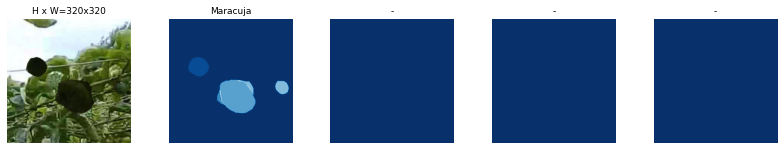

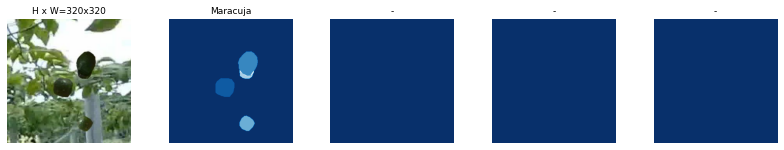

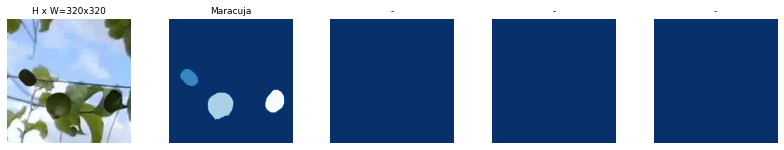

Displaying examples from validation dataset:


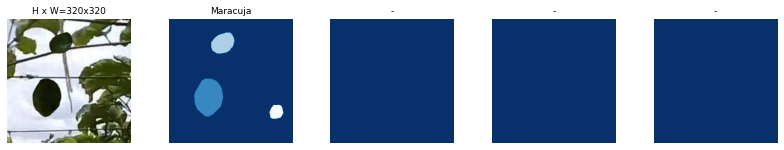

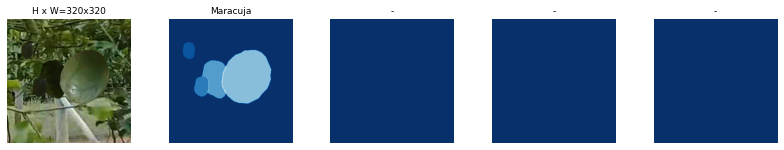

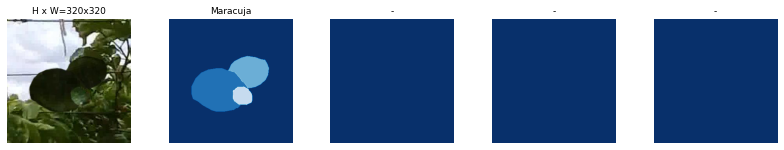

In [ ]:
#Indicar o endereço da pasta de treinamento e do arquivo coco_instance.json
EndTreinamento=os.path.join(pathRaiz, "Treinamento")
dataset_train = CocoLikeDataset()
dataset_train.load_data(os.path.join(EndTreinamento, "coco_instances.json"),os.path.join(EndTreinamento, "images"))
dataset_train.prepare()
 
#Indicar o endereço da pasta de treinamento e do arquivo coco_instance.json
EndValidacao=os.path.join(pathRaiz, "Validacao")
dataset_val = CocoLikeDataset()
dataset_val.load_data(os.path.join(EndValidacao, "coco_instances.json"),os.path.join(EndValidacao, "images"))
dataset_val.prepare()
 
 
#Apresentação de algumas imagens aleatórias do banco de dados de treinamento e validação a fim de ver se está tudo ok.
for name, dataset in [('training', dataset_train), ('validation', dataset_val)]:
    print(f'Displaying examples from {name} dataset:')
    
    image_ids = np.random.choice(dataset.image_ids, 3)
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

# Criar o modelo da rede

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


# Carregando os pesos sinápticos (Redes já treinadas) para o início do treinamento

Essa é uma estratégia importante, pois possibilita que o treinamento não comece do zero. Isse economiza muito tempo e melhorando a eficiência do treinamento.

Se deixar o parâmetro init_with com a palavra coco, será feito o download e utilização de pesos ja treinados préviamente. 
Deixar a palavra "last" é ideal em situações onde já se iniciou o treinamento e deseja-se carregar os pesos já treinados para inicar novas épocas de treinamento.

In [ ]:
 
#Endereço do objeto com os pesos sinapticos, caso seja existente
COCO_MODEL_PATH = os.path.join(pathRaiz, "maskrcnncoco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
 
 
 
# Which weights to start with?
init_with = "last"  # imagenet, coco, or last
 
if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)
 
print('Pesos carregados')

... done downloading pretrained model!



Pesos carregados


# Iniciar treinamento

O treinamento pode ser feito em duas etapas. 

> 1. Apenas os pesos das últimas camadas são ajustadas pelo treinamento. Aqui todas as camadas backbone são congeladas e o treinamento é feito apenas nas últimas camadas.
>2. Treinamento de todas as camadas. Isto possibilita o ajuste do peso sinaptico de todas as camadas da rede neural.



In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
start_train = time.time()
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=50, 
            layers='heads')
end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)
print(f'O treinamento demorou {minutes} minutos')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/GoogleColab/MaskRcnn/Projeto_Maracuja/logs/rede20210212T1519/mask_rcnn_rede_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/50
49/50 [============================>.] - ETA: 6s - loss: 2.0375 - rpn_class_loss: 0.0499 - rpn_bbox_loss: 0.7926 - mrcnn_class_loss: 0.1395 - mrcnn_bbox_loss: 0.4037 - mrcnn_mask_loss: 0.6519 

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


50/50 [==============================] - 556s - loss: 2.0187 - rpn_class_loss: 0.0496 - rpn_bbox_loss: 0.7889 - mrcnn_class_loss: 0.1374 - mrcnn_bbox_loss: 0.3984 - mrcnn_mask_loss: 0.6444 - val_loss: 1.1392 - val_rpn_class_loss: 0.0335 - val_rpn_bbox_loss: 0.6560 - val_mrcnn_class_loss: 0.0264 - val_mrcnn_bbox_loss: 0.1278 - val_mrcnn_mask_loss: 0.2956
Epoch 2/50
50/50 [==============================] - 77s - loss: 0.9467 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.6141 - mrcnn_class_loss: 0.0274 - mrcnn_bbox_loss: 0.1128 - mrcnn_mask_loss: 0.1641 - val_loss: 0.9164 - val_rpn_class_loss: 0.0253 - val_rpn_bbox_loss: 0.6170 - val_mrcnn_class_loss: 0.0378 - val_mrcnn_bbox_loss: 0.1052 - val_mrcnn_mask_loss: 0.1310
Epoch 3/50
50/50 [==============================] - 77s - loss: 0.8333 - rpn_class_loss: 0.0226 - rpn_bbox_loss: 0.5543 - mrcnn_class_loss: 0.0345 - mrcnn_bbox_loss: 0.0965 - mrcnn_mask_loss: 0.1254 - val_loss: 0.8570 - val_rpn_class_loss: 0.0194 - val_rpn_bbox_loss: 0.5577 - v

Ao colocar "**layers = 'all'**" o peso de todos as camadas são ajustadas pelo treinamento. Este tipo de treinamento nem sempre é feito.

In [ ]:
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
start_train = time.time()
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=20, 
            layers="all")
end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)
print(f'Training took {minutes} minutes')

# Preparar as redes para a inferência (Predição)

Com estas funções abaixo é possível dizer qual será o novo dimensionamento que as imagens da amostra teste (imagens para testar a rede) terá (IMAGE_MIN_DIM E IMAGE_MAX_DIM).
Além disso é possível estabelecer o limiar de certeza (probabilidade) a partir do qual o objeto será detectado como o alvo.

In [ ]:
class InferenceConfig(CocoSynthConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    DETECTION_MIN_CONFIDENCE = 0.95
    #2 4 8 16 32 64 128 256 512 1024 2048 4096 8192
 
inference_config = InferenceConfig()
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

In [ ]:
# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = str(Path(ROOT_DIR) / "logs" / "box_synthetic20190328T2255/mask_rcnn_box_synthetic_0016.h5" )
model_path = model.find_last()
model_path = "/content/drive/My Drive/GoogleColab/MaskRcnn/Projeto_Maracuja/logs/rede20210212T1519/mask_rcnn_rede_0018.h5"
# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/My Drive/GoogleColab/MaskRcnn/Projeto_Maracuja/logs/rede20210212T1519/mask_rcnn_rede_0018.h5
Re-starting from epoch 18


Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


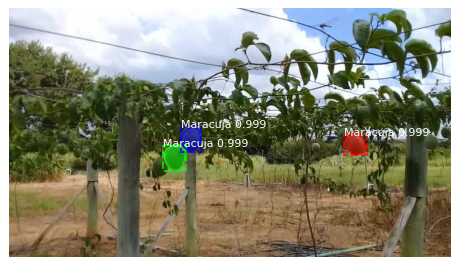

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


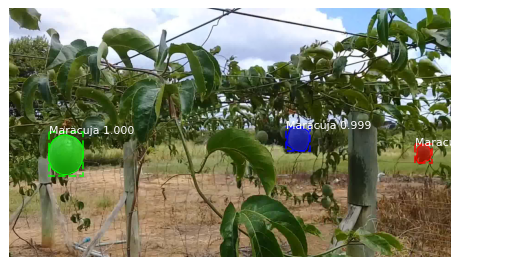

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


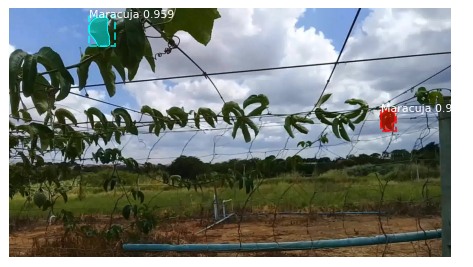

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


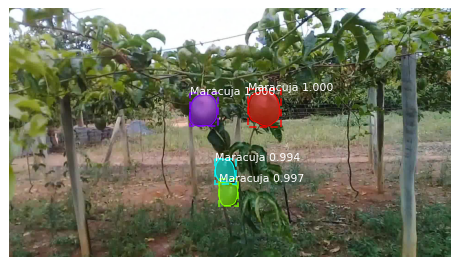

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


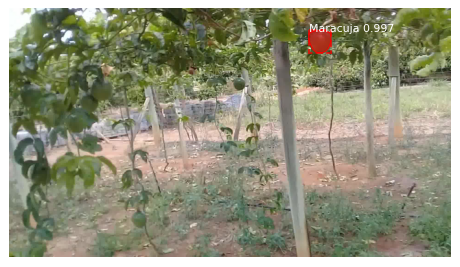

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


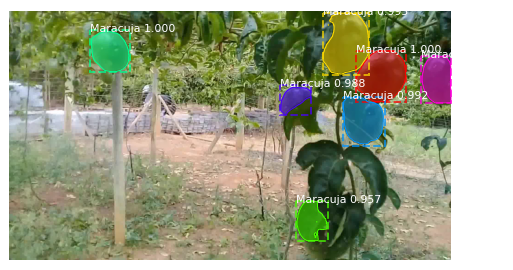

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


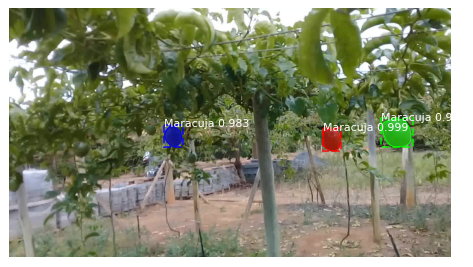

In [ ]:
import skimage
 
real_test_dir = '/content/drive/My Drive/GoogleColab/MaskRcnn/Projeto_Maracuja/Teste'
image_paths = []
for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))
 
for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)
    results = model.detect([img_arr], verbose=1)
    r = results[0]
    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                                dataset_train.class_names, r['scores'], figsize=(8,8))